In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
from apyori import apriori 
from pyspark import SparkContext
from pyspark.mllib.fpm import FPGrowth
import networkx as nx
from networkx import (draw,DiGraph,Graph)
import matplotlib.pyplot as plt
import pickle 
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
ROOT = "/Users/bryan/Desktop/Big_data_analysis/project/"


In [112]:
ex = pd.read_excel(ROOT+"protein_data.xlsx")

In [376]:
ex

,Uniprot,Entry_name,Gene,Protein,ProteinID,P002,P004,P005,P006,P007,...,P099,P100,P101,P102,P103,P104,P109,P110,P111,P112
0,O95881,TXD12_HUMAN,TXNDC12,Thioredoxin domain-containing protein 12,sp|O95881|TXD12_HUMAN Thioredoxin domain-conta...,3.541,2.417,2.075,3.837,3.254,...,1.965,1.280,3.104,3.421,2.028,3.317,2.278,2.855,3.268,1.390
1,O00330,ODPX_HUMAN,PDHX,Pyruvate dehydrogenase protein X component mit...,sp|O00330|ODPX_HUMAN Pyruvate dehydrogenase pr...,0.985,0.802,1.299,1.437,1.139,...,0.912,1.022,1.308,1.317,0.971,1.032,1.207,0.967,1.313,1.095
2,Q96GX9,MTNB_HUMAN,APIP,Methylthioribulose-1-phosphate dehydratase,sp|Q96GX9|MTNB_HUMAN Methylthioribulose-1-phos...,2.073,2.599,1.742,2.406,1.627,...,1.915,2.135,3.425,3.201,1.809,6.836,1.915,2.465,2.311,1.514
3,Q9UI95,MD2L2_HUMAN,MAD2L2,Mitotic spindle assembly checkpoint protein MAD2B,sp|Q9UI95|MD2L2_HUMAN Mitotic spindle assembly...,0.964,1.374,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,3.990,3.908,2.061,1.596
4,O76071,CIAO1_HUMAN,CIAO1,Probable cytosolic iron-sulfur protein assembl...,sp|O76071|CIAO1_HUMAN Probable cytosolic iron-...,2.244,2.226,1.712,1.724,1.308,...,1.609,1.521,2.776,3.274,1.591,2.903,1.917,2.814,2.077,1.343
5,Q53EP0,FND3B_HUMAN,FNDC3B,Fibronectin type III domain-containing protein 3B,sp|Q53EP0|FND3B_HUMAN Fibronectin type III dom...,2.089,1.957,1.897,1.346,2.298,...,2.199,1.466,2.436,2.196,1.658,1.285,2.200,1.838,1.522,1.254
6,Q13423,NNTM_HUMAN,NNT,NAD(P) transhydrogenase mitochondrial,sp|Q13423|NNTM_HUMAN NAD(P) transhydrogenase m...,1.124,0.816,1.215,1.144,1.124,...,0.942,0.802,1.378,1.167,1.172,1.076,1.287,0.873,0.908,1.073
7,P04434,KV310_HUMAN,NaN,Ig kappa chain V-III region VH (Fragment),sp|P04434|KV310_HUMAN Ig kappa chain V-III reg...,1.780,3.903,1.642,1.596,1.318,...,3.132,3.347,4.974,2.773,2.265,6.326,1.881,2.195,1.143,1.771
8,O15066,KIF3B_HUMAN,KIF3B,Kinesin-like protein KIF3B,sp|O15066|KIF3B_HUMAN Kinesin-like protein KIF...,1.224,1.391,1.451,1.465,1.122,...,1.540,1.198,2.301,2.214,1.323,2.212,1.510,1.873,1.300,0.869
9,Q9BRX9,WDR83_HUMAN,WDR83,WD repeat domain-containing protein 83,sp|Q9BRX9|WDR83_HUMAN WD repeat domain-contain...,0.944,1.045,1.178,0.915,0.868,...,0.814,1.187,1.519,1.360,1.276,1.417,1.341,1.282,1.732,1.208


In [113]:
ex.index = ex.Uniprot

In [114]:
exs = ex.iloc[:,5:].transpose()

In [115]:
exs

Uniprot,O95881,O00330,Q96GX9,Q9UI95,O76071,Q53EP0,Q13423,P04434,O15066,Q9BRX9,...,Q7Z3Y8,Q71F23,P51686,Q14CM0,P05813,Q8IYD8,P28698,Q8WTT0,Q9UJP4,P33981
P002,3.541,0.985,2.073,0.964,2.244,2.089,1.124,1.780,1.224,0.944,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P004,2.417,0.802,2.599,1.374,2.226,1.957,0.816,3.903,1.391,1.045,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P005,2.075,1.299,1.742,1.000,1.712,1.897,1.215,1.642,1.451,1.178,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P006,3.837,1.437,2.406,1.000,1.724,1.346,1.144,1.596,1.465,0.915,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P007,3.254,1.139,1.627,1.000,1.308,2.298,1.124,1.318,1.122,0.868,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P009,2.649,1.250,2.019,1.167,1.776,2.303,1.629,1.460,1.744,1.417,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P010,3.372,1.347,2.073,1.396,1.794,2.178,1.273,3.251,1.696,1.739,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P011,2.079,1.126,0.929,0.917,1.003,1.803,1.224,0.945,0.794,0.982,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P012,3.536,1.461,1.856,1.322,1.789,1.975,1.357,0.920,1.570,1.632,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P013,1.578,1.212,2.231,1.000,1.783,1.493,1.393,2.130,1.736,1.099,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [116]:
exs.to_csv(ROOT+ "exs.csv",index=False)

In [90]:
print("Input customized threhold or 'Enter' to continue")


Input customized threhold or 'Enter' to continue


In [4]:
exs = pd.read_csv(ROOT+ "exs.csv")
exs

,O95881,O00330,Q96GX9,Q9UI95,O76071,Q53EP0,Q13423,P04434,O15066,Q9BRX9,...,Q7Z3Y8,Q71F23,P51686,Q14CM0,P05813,Q8IYD8,P28698,Q8WTT0,Q9UJP4,P33981
0,3.541,0.985,2.073,0.964,2.244,2.089,1.124,1.780,1.224,0.944,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.417,0.802,2.599,1.374,2.226,1.957,0.816,3.903,1.391,1.045,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2.075,1.299,1.742,1.000,1.712,1.897,1.215,1.642,1.451,1.178,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3.837,1.437,2.406,1.000,1.724,1.346,1.144,1.596,1.465,0.915,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,3.254,1.139,1.627,1.000,1.308,2.298,1.124,1.318,1.122,0.868,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2.649,1.250,2.019,1.167,1.776,2.303,1.629,1.460,1.744,1.417,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,3.372,1.347,2.073,1.396,1.794,2.178,1.273,3.251,1.696,1.739,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,2.079,1.126,0.929,0.917,1.003,1.803,1.224,0.945,0.794,0.982,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,3.536,1.461,1.856,1.322,1.789,1.975,1.357,0.920,1.570,1.632,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.578,1.212,2.231,1.000,1.783,1.493,1.393,2.130,1.736,1.099,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [412]:
exs.index = exs1.index

In [417]:

with open(ROOT + "index.pkl","wb") as f:
    pickle.dump(exs1.index,f)

In [6]:
with open(ROOT + "index.pkl","rb") as f:
    a = pickle.load(f)
exs.index = a
exs.head()

,TXD12,ODPX,MTNB,MD2L2,CIAO1,FND3B,NNTM,KV310,KIF3B,WDR83,...,K1C27,CENPU,CCR9,FRPD4,CRBA1,FANCM,MZF1,CLC4C,KLH21,TTK
P002,3.541,0.985,2.073,0.964,2.244,2.089,1.124,1.780,1.224,0.944,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P004,2.417,0.802,2.599,1.374,2.226,1.957,0.816,3.903,1.391,1.045,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P005,2.075,1.299,1.742,1.000,1.712,1.897,1.215,1.642,1.451,1.178,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P006,3.837,1.437,2.406,1.000,1.724,1.346,1.144,1.596,1.465,0.915,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
P007,3.254,1.139,1.627,1.000,1.308,2.298,1.124,1.318,1.122,0.868,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### set threshold

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
a = exs.values.reshape((-1,))


SyntaxError: invalid syntax (<ipython-input-20-d746f0b8f7aa>, line 2)

In [21]:
1/32

0.03125

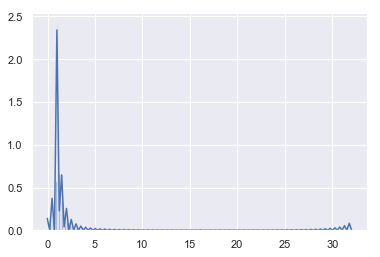

In [16]:
sns.set()
t = sns.distplot(a,200)

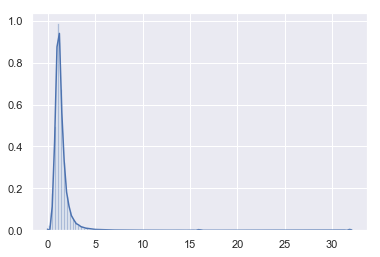

In [17]:
sns.set()
t = sns.distplot(a[a!=1],200)

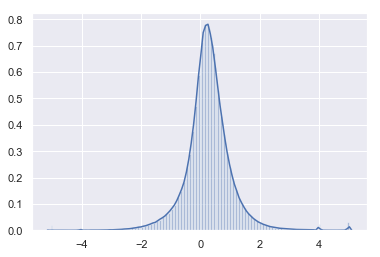

In [9]:
a = np.log2(a)
sns.set()
t = sns.distplot(a[a!=0],200)

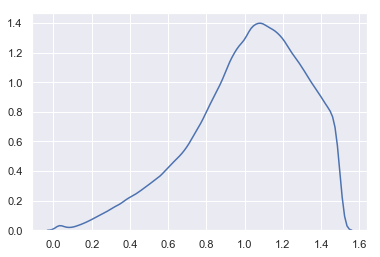

In [128]:
sns.kdeplot(a[a<1.6])

In [152]:
hist, bin_edges = np.histogram(a[a<1],bins = 20)

In [137]:
np.where(bin_edges>1)

(array([133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
        185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
        198, 199, 200]),)

In [153]:
hist

array([ 1581,   791,  1664,  2698,  4062,  5255,  6707,  8251,  9786,
       11236, 13016, 15582, 17709, 20569, 23969, 28798, 32938, 38337,
       43341, 48455])

In [154]:
bin_edges

array([0.03   , 0.07845, 0.1269 , 0.17535, 0.2238 , 0.27225, 0.3207 ,
       0.36915, 0.4176 , 0.46605, 0.5145 , 0.56295, 0.6114 , 0.65985,
       0.7083 , 0.75675, 0.8052 , 0.85365, 0.9021 , 0.95055, 0.999  ])

In [141]:
bin_edges[133+13]

1.006885

In [75]:
# up,low,num = [], [], []

#         upper=i/100
#         lower= j/100
#         up.append(i)
#         low.append(j)
#         a = exs.values
#         num.append(len(a[(a>upper)|(a<lower)]))
# #         abnormal_count = exs[(exs>upper)|(exs<lower)].count()
# #         num.append(len(abnormal_count[abnormal_count>60]))

In [77]:
# num = np.array(num)
# up = np.array(up)
# low = np.array(low)

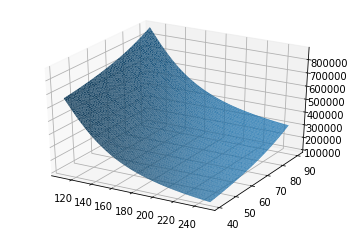

In [76]:
# from mpl_toolkits.mplot3d import Axes3D
 
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
 
# X = up
# Y = low
# # X, Y = np.meshgrid(X, Y)
# Z = num
 
# # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

# ax.plot_trisurf(X, Y, Z)
# plt.show()

In [70]:
import scipy.io as scio

In [78]:
# dataNew = ROOT+ 'total_num.mat'
# scio.savemat(dataNew, {'total_num':num})
# dataNew = ROOT+ 'up.mat'
# scio.savemat(dataNew, {'up':up})
# dataNew = ROOT+ 'low.mat'
# scio.savemat(dataNew, {'low':low})


In [118]:
# exs[exs>upper].count()["TXD12"]-2>2

True

In [74]:
# dataNew = ROOT+ 'pro_num.mat'
# scio.savemat(dataNew, {'pro_num':num})

In [177]:
upper=1.5
lower=0.7

In [182]:
# pro["O95881"] = None

In [184]:
(corr.values>-100).sum()

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


55460467

In [185]:
(abs(corr.values)>0.95).sum()//2

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


2842

In [47]:
corr.values[abs(corr.values)>0.95]

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([0.97089783, 0.95041815, 0.95145059, ..., 0.97861323, 0.97351089,
       0.97868656])

In [16]:
up,low,num = [], [], []
for i in range(120,200,5):
    for j in range(10,40,5):
        upper=i/100
        lower=-j/100+1
        up.append(upper)
        low.append(lower)
        abnormal_count = exs[(exs>upper)|(exs<lower)].count()
        min_periods = 20
        pro = exs.transpose()[abnormal_count>min_periods]
        pro[(pro<upper) & (pro > lower)] = None
        corr = pro.transpose().corr(min_periods = min_periods)
        num.append(((abs(corr.values)>0.95).sum()-corr.shape[0])//2)

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


In [20]:
up,low,num = [], [], []
for i in range(120,200,5):
    for j in range(10,40,5):
        upper=i/100
        lower=-j/100+1
        up.append(upper)
        low.append(lower)
        abnormal_count = exs[(exs>upper)|(exs<lower)].count()
        min_periods = 30
        pro = exs.transpose()[abnormal_count>min_periods]
        pro[(pro<upper) & (pro > lower)] = None
        corr = pro.transpose().corr(min_periods = min_periods)
        num.append(((abs(corr.values)>0.9).sum()-corr.shape[0])//2)

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


In [8]:
((abs(corr.values)>0.95)).sum()//2

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


8439

In [12]:
print(num,"\n",up,"\n",low)

[8874, 10926, 14047, 17673, 11669, 13907, 17024, 20945, 15156, 16472, 19787, 24707, 19165, 18979, 22439, 26711, 22291, 21107, 24030, 27634, 26008, 23077, 23739, 26602] 
 [1.2, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.25, 1.3, 1.3, 1.3, 1.3, 1.35, 1.35, 1.35, 1.35, 1.4, 1.4, 1.4, 1.4, 1.45, 1.45, 1.45, 1.45] 
 [0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75]


In [15]:
print(num,"\n",up,"\n",low)

[4555, 4991, 5831, 6957, 5062, 5288, 6308, 7824, 5465, 5542, 6842, 8716, 5899, 5804, 7277, 9664, 6247, 6277, 7526, 10093, 6658, 6497, 7444, 9542] 
 [1.2, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.25, 1.3, 1.3, 1.3, 1.3, 1.35, 1.35, 1.35, 1.35, 1.4, 1.4, 1.4, 1.4, 1.45, 1.45, 1.45, 1.45] 
 [0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75, 0.9, 0.85, 0.8, 0.75]


In [17]:
##20
print(num,"\n",up,"\n",low)

[3151, 3185, 3246, 3710, 5731, 10468, 3174, 3137, 3338, 4018, 6612, 12011, 3087, 3103, 3348, 3975, 7352, 12791, 3084, 3028, 3546, 4244, 8583, 13757, 3028, 2992, 3562, 4285, 8553, 14223, 3013, 3086, 3431, 4293, 8693, 14463, 2842, 2965, 3347, 4424, 8958, 15519, 2919, 3170, 3449, 4766, 8878, 16124, 3004, 3130, 3261, 4573, 8515, 16397, 3154, 3115, 3472, 4759, 7989, 15822, 3270, 3233, 3534, 4863, 8026, 15247, 3377, 3385, 3638, 4734, 7561, 14400, 3495, 3416, 3765, 4663, 7451, 13951, 3638, 3550, 3769, 4587, 6985, 13595, 3701, 3673, 3857, 4563, 6829, 12962, 3922, 3842, 4036, 4742, 6763, 12198] 
 [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.35, 1.35, 1.35, 1.35, 1.35, 1.35, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.8, 1.8

In [19]:
##30
print(num,"\n",up,"\n",low)

[1733, 1600, 1541, 1687, 2441, 5022, 1463, 1397, 1404, 1736, 2492, 5768, 1356, 1316, 1353, 1694, 2558, 6166, 1290, 1273, 1377, 1809, 2688, 6469, 1229, 1265, 1403, 1840, 2845, 6842, 1214, 1299, 1427, 1867, 2993, 7209, 1238, 1366, 1511, 1988, 3237, 7713, 1266, 1425, 1622, 2121, 3451, 8083, 1277, 1428, 1661, 2090, 3529, 8393, 1334, 1504, 1743, 2170, 3661, 8322, 1373, 1547, 1788, 2263, 3902, 8408, 1414, 1587, 1783, 2341, 3862, 8120, 1467, 1643, 1833, 2394, 3911, 8304, 1500, 1691, 1878, 2427, 4002, 8228, 1536, 1760, 1950, 2496, 3884, 8151, 1611, 1817, 1977, 2505, 3887, 7838] 
 [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.35, 1.35, 1.35, 1.35, 1.35, 1.35, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.8, 1.8, 1.8, 1.8, 1.8,

In [21]:
##30  0.9
print(num,"\n",up,"\n",low)

[7637, 8138, 9341, 13890, 22034, 32388, 7429, 8140, 9549, 14950, 24217, 35524, 7403, 8141, 9650, 16205, 25582, 37919, 7350, 8452, 10127, 17416, 27066, 40047, 7318, 8422, 10400, 17626, 27691, 41413, 7426, 8301, 10661, 17839, 27784, 42129, 7675, 8574, 11281, 18722, 29192, 43397, 7836, 8795, 11653, 18832, 29809, 43937, 7611, 8513, 11338, 18881, 30232, 44838, 7598, 8747, 11375, 18331, 29159, 43729, 7795, 9038, 11746, 18408, 28514, 43137, 7945, 9215, 11552, 17726, 27195, 41368, 8048, 9509, 11523, 17489, 26632, 39010, 8104, 9601, 11654, 16986, 26314, 37601, 8161, 9624, 11574, 16687, 25414, 36344, 8245, 9684, 11647, 16172, 24078, 33790] 
 [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.35, 1.35, 1.35, 1.35, 1.35, 1.35, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.55, 1.55, 1.55, 1.55, 1.55, 1.55, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.65, 1.65, 1.65, 1.65, 1.65, 1.65, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7,

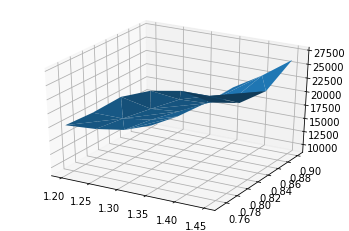

In [13]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = up
Y = low
# X, Y = np.meshgrid(X, Y)
Z = num
 
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

ax.plot_trisurf(X, Y, Z)
plt.show()

In [100]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import urllib
from urllib.error import HTTPError
from urllib.request import urlopen

In [121]:
string_api_url = "https://string-db.org/api"
output_format = "tsv-no-header"
method = "get_string_ids"
my_genes = ["MTNB"]
species = "9606"
request_url = string_api_url + "/" + output_format + "/" + method + "?"
request_url += "identifiers=%s"%"%0d".join(my_genes)
request_url += "&" + "species=" + species
try:
        rrr = urlopen(request_url)
except HTTPError as e:
        print("Error: ", e,"\n",request_url)
print(request_url)        
for line in rrr:
        inf = str(line, encoding = "utf-8").split("\t")
        dict = {}
        dict['id'] = inf[4]

        dict["group"] = 1
        print(inf[5])

https://string-db.org/api/tsv-no-header/get_string_ids?identifiers=MTNB&species=9606
Methylthioribulose-1-phosphate dehydratase; Catalyzes the dehydration of methylthioribulose-1- phosphate (MTRu-1-P) into 2,3-diketo-5-methylthiopentyl-1- phosphate (DK-MTP-1-P). Functions in the methionine salvage pathway, which plays a key role in cancer, apoptosis, microbial proliferation and inflammation. May inhibit the CASP1-related inflammatory response (pyroptosis), the CASP9-dependent apoptotic pathway and the cytochrome c-dependent and APAF1-mediated cell death; Belongs to the aldolase class II family. MtnB subfamily



### correlation matrix

In [9]:
import matplotlib.pyplot as plt

In [98]:
upper=1.2
lower=1/1.2
min_periods = 10

In [99]:
abnormal_count = exs[(exs>upper)|(exs<lower)].count()
(abnormal_count.values> min_periods).sum()
pro = (exs).copy().transpose()[abnormal_count>min_periods]

pro[(pro<upper) & (pro > lower)] = None
## min_periods : int, optional
## Minimum number of observations required per pair of columns 
## to have a valid result. Currently only available for pearson and spearman correlation
corr = np.log(pro.transpose()).corr(min_periods = min_periods)
for i in range(corr.shape[0]):
    corr.iloc[i,i] = 0

In [103]:
(abs(corr.values)>0.75).sum()

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


2426482

In [48]:
k = 6

In [211]:
from sklearn.cluster import KMeans

In [212]:
upper=2
lower=0.5
min_periods = 15
abnormal_count = exs[(exs>upper)|(exs<lower)].count()
pro0 = (exs).copy().transpose()[abnormal_count>min_periods]
pro0[(pro0<upper) & (pro0 > lower)] = 1
logpro = np.log(pro0.transpose())

In [213]:
np.sum(pro0.values!=1,axis =0)

array([1567, 1500,  782, 1486, 1251, 1658, 1722,  661, 1604, 1113,  846,
        977, 1609,  736,  573,  818,  790, 1627, 1183, 1185,  842, 1121,
        424,  802, 1123,  717,  755,  761, 1333, 1099,  399,  564, 1448,
        253, 1289, 1743, 1717, 1044,  955,  974, 1882, 1510, 1749,  437,
       1486, 1053, 1102,  366, 1493, 1682,  462, 1177, 2257, 2021, 1707,
       1406,  978, 1648, 1259,  765,  801, 1059,  371, 1110,  742, 1336,
       1896, 2156,  765, 1111,  817, 2535, 2080,  141,   99, 2389, 1660,
        161,  263, 1827, 1972, 1439, 1279,  783, 1486,  448,  982, 1197,
        640, 1264, 1090, 1916, 2115, 1508,  818, 2480, 2456, 1286, 2300,
       1955, 2462, 1783,  628])

In [240]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(logpro)
x = pca.transform(logpro)

In [267]:
model = KMeans(n_clusters = 5, n_jobs = 4, max_iter = 1000000, init='k-means++') 
model.fit(x)
model.inertia_

9488.430129367865

In [273]:
pd.Series(model.labels_).value_counts()

2    37
0    23
4    19
1    14
3    10
dtype: int64

In [277]:
a = pd.Series(model.labels_)

In [278]:
pat = logpro.copy()
pat["label"] = a

In [279]:
pat

,O95881,Q96GX9,O76071,Q53EP0,P04434,P29728,O60942,Q6F5E8,Q9UGI8,Q13185,...,Q14532,Q8WUX2,Q96MI9,Q2M2I5,Q96S21,P83105,Q9BT76,O95274,Q9NPH5,label
0,1.264409,0.728997,0.808260,0.736685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
1,0.882527,0.955127,0.800206,0.000000,1.361745,0.000000,0.000000,0.000000,0.000000,0.953972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
2,0.729961,0.000000,0.000000,0.000000,0.000000,0.000000,0.698135,0.000000,0.000000,0.709021,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
3,1.344691,0.877966,0.000000,0.000000,0.000000,0.000000,0.000000,1.389290,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,1.179885,0.000000,0.000000,0.832039,0.000000,0.000000,0.000000,0.000000,0.709021,0.950112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,0.974182,0.702602,0.000000,0.834213,0.000000,0.000000,0.762673,0.000000,0.000000,0.793445,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
6,1.215506,0.728997,0.000000,0.778407,1.178963,0.000000,0.727549,0.872130,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
7,0.731887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
8,1.262996,0.000000,0.000000,0.000000,0.000000,1.458382,0.000000,0.000000,0.000000,0.949339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
9,0.000000,0.802450,0.000000,0.000000,0.756122,0.000000,0.744790,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [229]:
r = pd.concat([logpro, pd.Series(model.labels_, index = logpro.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(logpro.columns) + ["class"]

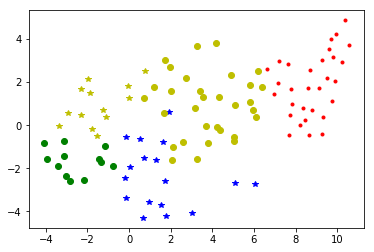

In [230]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(x) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_) #转换数据格式

import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r["class"] == 0]   
plt.plot(d[0], d[1], 'r.')
d = tsne[r["class"] == 1]
plt.plot(d[0], d[1], 'y*')
d = tsne[r["class"] == 2]
plt.plot(d[0], d[1], 'b*')
d = tsne[r["class"] == 3]
plt.plot(d[0], d[1],"go")
d = tsne[r["class"] == 4]
plt.plot(d[0], d[1],"yo")
d = tsne[r["class"] == 5]
plt.plot(d[0], d[1],"bo")

plt.show()


In [149]:
x.shape

(103, 3)

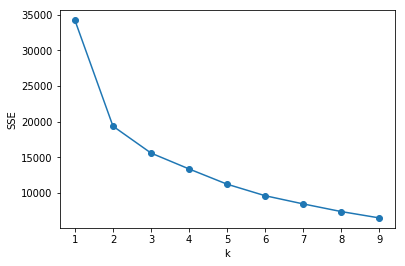

In [158]:
# upper=1.6
# lower=0.6
# min_periods = 10
# pro0 = (exs).copy().transpose()[abnormal_count>min_periods]
# pro0[(pro0<upper) & (pro0 > lower)] = 1
# logpro = np.log(pro0.transpose())
SSE = []  
for k in range(1,10):
    estimator = KMeans(n_clusters=k,max_iter = 1000000)  
    estimator.fit(x)
    SSE.append(estimator.inertia_)
X = range(1,10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

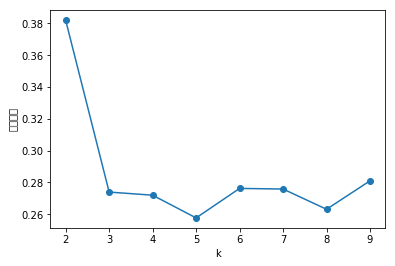

In [157]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
 

Scores = []  # 存放轮廓系数
for k in range(2,10):
    estimator = KMeans(n_clusters=k,max_iter = 1000000)  # 构造聚类器
    estimator.fit(x)
    Scores.append(silhouette_score(x,estimator.labels_,metric='euclidean'))
X = range(2,10)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X,Scores,'o-')
plt.show()

In [422]:
for i in range(110,150,2):
    for j in range(10,40,2):
        upper= i/100
        lower= -j/100+1
        min_periods = 10
        pro0 = (exs).copy().transpose()[abnormal_count>min_periods]
        pro0[(pro0<upper) & (pro0 > lower)] = 1
        logpro = np.log(pro0.transpose())
        SSE = []  
        diff = []
        for k in range(1,8):
            estimator = KMeans(n_clusters=k,max_iter = 1000000)  
            estimator.fit(logpro)
            SSE.append(estimator.inertia_)
            if k > 1:
                diff.append(SSE[k-2]-SSE[k-1])
        mini = 1e7
        if(min(diff) < mini):
            mini = min(diff)
            sse = SSE
            minup = upper
            minlow = lower

        
X = range(1,8)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,sse,'o-')
plt.show()
print(upper,lower)

KeyboardInterrupt: 

### Hierarchical Clustering for proteins

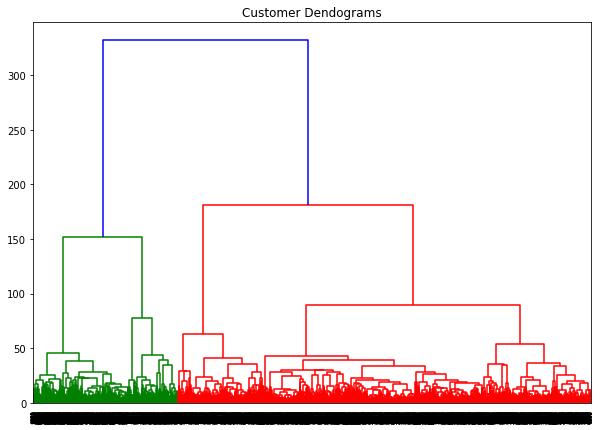

In [142]:
upper=1.6
lower= 1/1.6
min_periods = 15
abnormal_count = exs[(exs>upper)|(exs<lower)].count()
pro0 = (exs).copy().transpose()[abnormal_count>min_periods]
pro0[(pro0<upper) & (pro0 > lower)] = 1
logpro = np.log(pro0)
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(logpro, method='ward')) 

### Hierarchical Clustering for Patients

In [22]:
upper=1.3
lower= 1/1.3
min_periods = 10
abnormal_count = exs[(exs>upper)|(exs<lower)].count()
pro0 = (exs).copy().transpose()[abnormal_count>min_periods]
# pro0[(pro0<upper) & (pro0 > lower)] = 1
logpro = np.log(pro0.transpose())

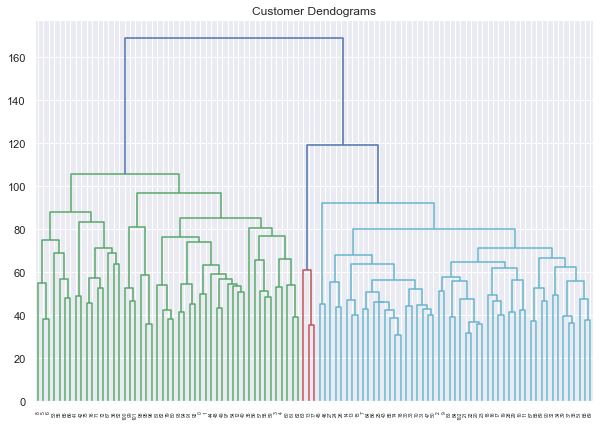

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(logpro, method='ward')) 

In [56]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
pre = cluster.fit_predict(logpro)  

In [146]:
# geneExp = {'genes' : ['a', 'b', 'c', 'd', 'e', 'f'],
#      	   'exp1': [-2.2, 5.6, 0.9, -0.23, -3, 0.1],
# 	   'exp2': [5.4, -0.5, 2.33, 3.1, 4.1, -3.2]
#           }
# df = pd.DataFrame( geneExp )
# df

,genes,exp1,exp2
0,a,-2.20,5.40
1,b,5.60,-0.50
2,c,0.90,2.33
3,d,-0.23,3.10
4,e,-3.00,4.10
5,f,0.10,-3.20


In [140]:
upper=1.3
lower= 1/1.3

min_periods = 10
exs = pd.read_csv(ROOT + "exs.csv")
with open(ROOT + "index.pkl","rb") as f:
    idx = pickle.load(f)
exs.index = idx
# exs = exs.iloc[:,exs.columns.isin(li)]
abnormal_count = exs[(exs>upper)|(exs<lower)].count()
pro = exs.copy().transpose()[abnormal_count>min_periods]
pro[(pro<upper) & (pro > lower)] = 1
logpro = np.log2(pro.transpose())
logpro["genes"] = logpro.index
logpro.head()

,O95881,O00330,Q96GX9,Q9UI95,O76071,Q53EP0,Q13423,P04434,O15066,Q9BRX9,...,Q9Y2B9,Q93015,Q15884,O14948,Q969W1,Q8WXB1,O94933,P50052,P56703,genes
P002,1.824157,0.00000,1.051720,0.000000,1.166073,1.062812,0.0,0.831877,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P002
P004,1.273217,0.00000,1.377957,0.458382,1.154454,0.968644,0.0,1.964583,0.476122,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P004
P005,1.053111,0.00000,0.800745,0.000000,0.775683,0.923720,0.0,0.715454,0.537048,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P005
P006,1.939979,0.52306,1.266637,0.000000,0.785760,0.428678,0.0,0.674461,0.550901,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P006
P007,1.702214,0.00000,0.702214,0.000000,0.387363,1.200379,0.0,0.398350,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P007


In [141]:
def reduce(function, iterable, initializer=None):
    it = iter(iterable)
    if initializer is None:
        value = next(it)
    else:
        value = initializer
    for element in it:
        value = function(value, element)
    return value

AttributeError: 'tuple' object has no attribute 'id'

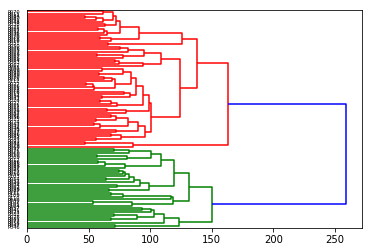

In [145]:
#!/usr/bin/python

# Load required modules
import pandas as pd 
import scipy.spatial
import scipy.cluster
import numpy as np
import json
import matplotlib.pyplot as plt

# Example data: gene expression
df = logpro

# Determine distances (default is Euclidean)
dataMatrix = np.array(logpro.iloc[:,:-1])
distMat = scipy.spatial.distance.pdist( dataMatrix )

# Cluster hierarchicaly using scipy
clusters = scipy.cluster.hierarchy.linkage(distMat, method='ward')
T = scipy.cluster.hierarchy.to_tree( clusters , rd=False )

# Create dictionary for labeling nodes by their IDs
labels = list(df.genes)
id2name = dict(zip(range(len(labels)), labels))

# Draw dendrogram using matplotlib to scipy-dendrogram.pdf
scipy.cluster.hierarchy.dendrogram(clusters, labels=labels, orientation='right')
plt.savefig("scipy-dendrogram.png")

# Create a nested dictionary from the ClusterNode's returned by SciPy
def add_node(node, parent ):
	# First create the new node and append it to its parent's children
	newNode = dict( node_id=node.id, children=[] )
	parent["children"].append( newNode )
    
	# Recursively add the current node's children
	if node.left: add_node( node.left, newNode )
	if node.right: add_node( node.right, newNode )
        

# Initialize nested dictionary for d3, then recursively iterate through tree
d3Dendro = dict(children=[], name="Root1")
add_node( T, d3Dendro )

# Label each node with the names of each leaf in its subtree
# def label_tree( n ):
# 	# If the node is a leaf, then we have its name
# 	if len(n["children"]) == 0:
# 		leafNames = [ id2name[n["node_id"]] ]
# 		n["name"] = name = "-".join(sorted(map(str, leafNames)))
# 	# If not, flatten all the leaves in the node's subtree
# 	else:
# 		leafNames = reduce(lambda ls, c: ls + label_tree(c), n["children"], [])
# 		n["name"] = name = ""
# 	# Delete the node id since we don't need it anymore and
# 	# it makes for cleaner JSON
# 	print(n["node_id"])

# 	# Labeling convention: "-"-separated leaf names


# 	return leafNames

# x = label_tree( d3Dendro["children"][0] )

# # Output to JSON
# json.dump(d3Dendro, open("d3-dendrogram.json", "w"), sort_keys=True, indent=4)

In [144]:
d3Dendro

{'children': [{'node_id': 204,
   'children': [{'node_id': 202,
     'children': [{'node_id': 197,
       'children': [{'node_id': 145,
         'children': [{'node_id': 41, 'children': []},
          {'node_id': 42, 'children': []}]},
        {'node_id': 193,
         'children': [{'node_id': 53, 'children': []},
          {'node_id': 190,
           'children': [{'node_id': 176,
             'children': [{'node_id': 135,
               'children': [{'node_id': 71, 'children': []},
                {'node_id': 75, 'children': []}]},
              {'node_id': 142,
               'children': [{'node_id': 72, 'children': []},
                {'node_id': 76, 'children': []}]}]},
            {'node_id': 188,
             'children': [{'node_id': 67, 'children': []},
              {'node_id': 180,
               'children': [{'node_id': 36, 'children': []},
                {'node_id': 52, 'children': []}]}]}]}]}]},
      {'node_id': 200,
       'children': [{'node_id': 195,
         'childre

In [33]:
[ id2name[n["node_id"]] ]

NameError: name 'n' is not defined

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
pre = cluster.fit_predict(logpro)  
pat = logpro.copy()
pat["label"] =  pre
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                            random_state=0)
clf.fit(logpro, pre)
x = logpro.copy().transpose()
x["importance"] = clf.feature_importances_
x.sort_values(by='importance',ascending=False).iloc[:,-1:]

,importance
Q14257,0.021794
O15484,0.019161
Q9Y4J8,0.016831
Q13683,0.015277
P11532,0.015106
Q96K17,0.014313
O60684,0.013639
Q96HE7,0.013081
P98198,0.012537
Q9H1I8,0.009858


In [69]:
for    
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')  
    pre = cluster.fit_predict(logpro)  
    pat = logpro.copy()
    pat["label"] =  pre
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.datasets import make_classification
    clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                                random_state=0)
    clf.fit(logpro, pre)
    x = logpro.copy().transpose()
    x["importance"] = clf.feature_importances_
    x.sort_values(by='importance',ascending=False)["importance"].head(30)

P56199    0.017953
O43556    0.013677
Q9BXJ2    0.013413
Q9UBX5    0.012393
O75822    0.011411
Q93070    0.011372
Q07507    0.010368
Q53TN4    0.010252
Q9UNW1    0.009792
P42696    0.009396
Q14562    0.008796
P17676    0.008748
Q9UQN3    0.008724
P14618    0.007831
Q8TDD1    0.007524
Q16853    0.007412
Q9NS69    0.007113
Q9ULH0    0.007024
P78316    0.006774
O95865    0.006589
Q92629    0.006424
Q8IX04    0.006370
P58658    0.006288
Q86TI2    0.006249
Q15814    0.006249
Q8WTT2    0.006180
Q8IX05    0.006057
O14646    0.006045
O43765    0.005958
P63096    0.005953
Name: importance, dtype: float64

In [119]:
pat.index = np.arange(len(pat))

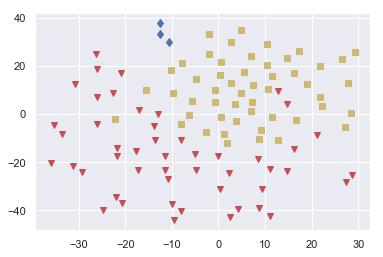

In [36]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(logpro) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_) #转换数据格式

import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[pat["label"] == 0]   
plt.plot(d[0], d[1], 'rv')
d = tsne[pat["label"] == 1]
plt.plot(d[0], d[1], 'ys')
d = tsne[pat["label"] == 2]
plt.plot(d[0], d[1], 'bd')
# d = tsne[r["class"] == 3]
# plt.plot(d[0], d[1],"go")
# d = tsne[r["class"] == 4]
# plt.plot(d[0], d[1],"yo")
# d = tsne[r["class"] == 5]
# plt.plot(d[0], d[1],"bo")

plt.show()



In [425]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import urllib
from urllib.error import HTTPError
from urllib.request import urlopen
import pickle 

upper = 1.6
lower = 1/1.6
min_periods = 10
threholds = 0.9
# 

# with open("./json/Patient-6.json","r") as file1:#change this part
#     data_patient = json.load(file1)
# # useful = {}
# # for keys in data_patient["data"].keys():
# #    if keys in related_dict.keys():
# #       useful[keys] = data_patient["data"][keys]
# # df=pd.DataFrame.from_dict(list(useful.items()))
# df = pd.DataFrame.from_dict(list(data_patient["data"].items()))
# df_outer = pd.DataFrame.from_dict(list(data_patient["data"].items()))

# patient_number=sorted(os.listdir("./json"))[2:]
# regex = "Patient-[0-9]+"
# ls = ["Patient-1"]
# for patients in patient_number:
#     if re.match(regex,patients)!=None:
#         names = patients[:-5]
        
#         with open("./json/" + patients) as file:
#             data_patient = json.load(file)
# #             useful = {}
# #             for keys in data_patient["data"].keys():
# #                 if keys in related_dict.keys():
# #                     useful[keys] = data_patient["data"][keys]
#         dfi =pd.DataFrame.from_dict(list(data_patient["data"].items()))
#         df = df.merge(dfi,left_on = 0, right_on = 0)
#         ls.append(names)
            
# ls.insert(0,"Protein")
# df.columns=ls
# abnormal_count = df[(df>upper)|(df<lower)].count()


# df_t = df.transpose()
# df_t.columns = df.iloc[:,0]
# df_t = df_t.drop("Protein", axis =0)
# df_t = df_t.astype('float64') 
# corr = df_t.corr()

ROOT = "/home/uestclzy/6895project/ProteinPathway/static/txt/"

exs = pd.read_csv(ROOT + "exs.csv")
with open(ROOT + "index.pkl","rb") as f:
    idx = pickle.load(f)
exs.index = idx
exs = exs.iloc[:,exs.columns.isin(pro_list)]
# abnormal_count = exs[(exs>upper)|(exs<lower)].count()
pro = exs.transpose()
pro[(pro<upper) & (pro > lower)] = None
corr = pro.transpose().corr(min_periods = min_periods)
for i in range(corr.shape[0]):
    corr.iloc[i,i] = 0
print("Type in the list of proteins(separate with commas and end with Enter):\n")
corr = corr.where(corr.notnull(), 0)

def score_to_graph(pro_list):
        nodes = []
        f = open(ROOT +'anootation.txt','a')
        k = 0
        for i in range(len(pro_list)): 
            string_api_url = "https://string-db.org/api"
            output_format = "tsv-no-header"
            method = "get_string_ids"
            my_genes = [pro_list[i]]
            species = "9606"
            request_url = string_api_url + "/" + output_format + "/" + method + "?"
            request_url += "identifiers=%s"%"%0d".join(my_genes)
            request_url += "&" + "species=" + species
            try:
                    res = urlopen(request_url)
                    for line in res:
                        k = k+1
                        inf = str(line, encoding = "utf-8").split("\t")
                        dict = {}
                        dict['id'] = inf[4]
                        if k == 1:
                            f.write('{} :{}'.format(inf[4],inf[5]))
                        else:
                            f.write('\n{} :{}'.format(inf[4],inf[5]))
                        dict["group"] = 1
                        nodes.append(dict)
            except HTTPError as e:
                    print("Error: ", e,"\n",request_url)

        f.close()
   
       
        string_api_url = "https://string-db.org/api"
        output_format = "tsv-no-header"
        method = "network"

        my_genes = pro_list
        species = "9606"


        ## Construct the request

        request_url = string_api_url + "/" + output_format + "/" + method + "?"
        request_url += "identifiers=%s" % "%0d".join(my_genes)
    #     request_url += "&" + "species=" + species
        # request_url += "&" + "caller_identity=" + my_app
        # print(request_url)
        # try:
    #     print(request_url)
        try:
            res = urlopen(request_url)
            links = []
            for line in res:
                inf = str(line, encoding = "utf-8").split("\t")
                dict = {}
                dict['source'] = inf[2]
                dict["target"] = inf[3]
                dict["value"] = float(inf[5])
                links.append(dict)
            json_dict = {}
            json_dict['nodes'] = nodes
            json_dict['links'] = links
            with open('/home/uestclzy/6895project/ProteinPathway/static/json/1.json', 'w') as f:
                    json.dump(json_dict, f)
            f.close
            if (len(links)==0):
                    print("There is no interaction found among those proteins.")
            print("The protein interactions detected based on STRING DataBase:")
            print(pd.DataFrame(links))
        except HTTPError as e:
            print("Error: ", e,"\n",request_url)

        # except urllib.error as err:
        #     error_message = err.read()
        #     print (error_message)
        # sys.exit()
        
        ## Read and parse the results


def corr_to_json(pro_list,threholds = threholds):
    nodes = []
    links = []
    up = exs[exs>upper].count()
    low = exs[exs<lower].count()
    for i in range(len(pro_list)):
        dict = {}
        dict['id'] = pro_list[i]
        if up[pro_list[i]]//low[pro_list[i]] >6:
            dict['group'] = 1

        elif low[pro_list[i]]//up[pro_list[i]] >6:
            dict['group'] = 2

        else:
            dict['group'] = 3
        nodes.append(dict)
        for j in range(len(pro_list) - 1, i, -1):
#             print(i, j)
            if (pro_list[i] in corr.index) and (pro_list[j] in corr.index) :
                if (corr.loc[pro_list[i], pro_list[j]] > threholds):
#                 print(pro_list[i], pro_list[j])
#                 print(corr.loc[pro_list[i], pro_list[j]])
#                 dict = {}
#                 dict['id'] = pro_list[i]
#                 dict['group'] = 1
#                 nodes.append(dict)
                    dict = {}
                    dict['source'] = pro_list[i]
                    dict['target'] = pro_list[j]
                    dict['value'] = abs(corr.loc[pro_list[i], pro_list[j]])
                    links.append(dict)
    json_dict = {}
    json_dict['nodes'] = nodes
    json_dict['links'] = links
    #  print(nodes, links)
    with open('/home/uestclzy/6895project/ProteinPathway/static/json/2.json', 'w') as f:
                json.dump(json_dict, f)
    f.close

def to_corr_json(pro_list):
    json_dict = {}
    json_dict['ind'] = exs.index.tolist()
    json_dict['vars'] = pro_list   
    json_dict['corr'] = corr.values.tolist()
    json_dict['dat'] = exs.iloc[:,exs.columns.isin(pro_list)].transpose().values.tolist()
    with open('/home/uestclzy/6895project/ProteinPathway/static/json/3.json', 'w') as f:
            json.dump(json_dict, f)

FileNotFoundError: File b'/home/uestclzy/6895project/ProteinPathway/static/txt/exs.csv' does not exist

In [172]:
upper=1.6
lower= 1/1.6

min_periods = 10
exs = pd.read_csv(ROOT + "exs.csv")
with open(ROOT + "index.pkl","rb") as f:
    idx = pickle.load(f)
exs.index = idx
# exs = exs.iloc[:,exs.columns.isin(li)]
abnormal_count = exs[(exs>upper)|(exs<lower)].count()
pro = exs.copy().transpose()
pro[(pro<upper) & (pro > lower)] = None

corr = pro.transpose().corr(min_periods = min_periods)
for i in range(corr.shape[0]):
    corr.iloc[i,i] = 0
print("Type in the list of proteins(separate with commas and end with Enter):\n")
corr = corr.where(corr.notnull(), 0)
pro = exs.copy().transpose()
pro[(pro<upper) & (pro > lower)] = 1
corr0 = pro.transpose().corr()
# for i in range(corr0.shape[0]):
#     corr0.iloc[i,i] = 0
corr0[corr == 0] = 0
corr0

Type in the list of proteins(separate with commas and end with Enter):



,O95881,O00330,Q96GX9,Q9UI95,O76071,Q53EP0,Q13423,P04434,O15066,Q9BRX9,...,Q7Z3Y8,Q71F23,P51686,Q14CM0,P05813,Q8IYD8,P28698,Q8WTT0,Q9UJP4,P33981
O95881,0.000000,0.0,0.415490,0.141320,0.659288,0.397202,0.162955,0.200023,0.357413,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O00330,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q96GX9,0.415490,0.0,0.000000,0.000000,0.473540,-0.014632,0.000000,0.524134,0.403865,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9UI95,0.141320,0.0,0.000000,0.000000,0.201114,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O76071,0.659288,0.0,0.473540,0.201114,0.000000,0.509929,0.000000,0.283724,0.574375,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q53EP0,0.397202,0.0,-0.014632,0.000000,0.509929,0.000000,0.000000,0.156477,0.303315,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q13423,0.162955,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P04434,0.200023,0.0,0.524134,0.000000,0.283724,0.156477,0.000000,0.000000,0.270779,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O15066,0.357413,0.0,0.403865,0.000000,0.574375,0.303315,0.000000,0.270779,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q9BRX9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
exs = pd.read_csv(ROOT + "exs.csv")
len(exs.transpose())

14362

In [140]:
(abs(corr0.values)>0.75).sum()

/Users/bryan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


234300

In [134]:
pro

,P002,P004,P005,P006,P007,P009,P010,P011,P012,P013,...,P099,P100,P101,P102,P103,P104,P109,P110,P111,P112
P00533,0.513,0.543,1.0,1.0,1.000,1.000,0.585,1.000,0.555,1.0,...,0.586,1.000,0.434,0.575,0.593,1.000,0.479,1.0,0.539,1.0
P28482,1.678,1.000,1.0,1.0,1.624,1.578,1.533,1.793,1.673,1.0,...,1.000,1.808,1.000,1.000,1.000,1.559,1.000,1.0,1.000,1.0


In [105]:
li = ["P28482","P00533"]

In [118]:
exs = pd.read_csv(ROOT + "exs.csv")
with open(ROOT + "index.pkl","rb") as f:
    idx = pickle.load(f)
exs.index = idx
exs = exs.iloc[:,exs.columns.isin(li)]
exs

,P00533,P28482
P002,0.513,1.678
P004,0.543,1.474
P005,0.744,1.219
P006,0.749,1.384
P007,1.141,1.624
P009,0.794,1.578
P010,0.585,1.533
P011,0.696,1.793
P012,0.555,1.673
P013,0.958,1.474


In [42]:
def to_corr_json(pro_list):
    json_dict = {}
    json_dict['ind'] = exs.index.tolist()
    json_dict['vars'] = pro_list
    pro_corr = corr.iloc[corr.index.isin(pro_list),corr.columns.isin(pro_list)].values
    json_dict['corr'] = pro_corr.tolist()
    json_dict['dat'] = exs.iloc[:,exs.columns.isin(pro_list)].transpose().values.tolist()
    with open(ROOT + '3.json', 'w') as f:
            json.dump(json_dict, f)

In [ ]:
pro_corr = corr.iloc[corr.index.isin(pro_list),corr.columns.isin(pro_list)]

In [52]:
(corr) 

,CLD5,DEFI6,SDPR,MYO1C,PLSI,DEMA,JAM2,PPCS,CO6A6,KCY,...,RAGE,LAMA3,CTL2,GLP3L,TPIS,ACE,LYPA2,KANK3,GGCT,6PGL
CLD5,0.000000,NaN,0.704564,0.736019,NaN,0.457040,0.762291,NaN,NaN,-0.584413,...,0.626092,NaN,NaN,NaN,NaN,0.739423,-0.584266,NaN,-0.528950,NaN
DEFI6,NaN,0.000000,-0.547066,NaN,NaN,-0.452077,-0.519876,NaN,NaN,NaN,...,-0.654207,NaN,NaN,NaN,NaN,-0.509163,0.638840,NaN,NaN,NaN
SDPR,0.704564,-0.547066,0.000000,0.795064,NaN,0.495126,0.719266,-0.627598,NaN,-0.589594,...,0.626797,0.685753,0.776543,-0.486640,-0.585224,0.668457,-0.557694,0.841886,-0.573082,-0.528347
MYO1C,0.736019,NaN,0.795064,0.000000,NaN,0.555344,0.857445,NaN,NaN,-0.684611,...,0.727170,NaN,0.882357,NaN,-0.606024,0.693861,-0.637259,NaN,-0.585796,NaN
PLSI,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEMA,0.457040,-0.452077,0.495126,0.555344,NaN,0.000000,0.565954,NaN,NaN,-0.473265,...,0.559655,NaN,NaN,NaN,NaN,0.595076,-0.468271,NaN,-0.546025,NaN
JAM2,0.762291,-0.519876,0.719266,0.857445,NaN,0.565954,0.000000,NaN,NaN,-0.619652,...,0.690433,0.700788,0.823280,NaN,-0.470450,0.775369,-0.569873,NaN,-0.441113,NaN
PPCS,NaN,NaN,-0.627598,NaN,NaN,NaN,NaN,0.000000,NaN,0.778875,...,-0.652336,NaN,NaN,NaN,NaN,NaN,0.767213,NaN,0.694960,NaN
CO6A6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,0.763424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KCY,-0.584413,NaN,-0.589594,-0.684611,NaN,-0.473265,-0.619652,0.778875,NaN,0.000000,...,-0.557068,NaN,NaN,0.726026,0.739996,-0.589878,0.780137,NaN,0.640920,0.778864


In [43]:
to_corr_json(li)

In [24]:
li = corr.index.tolist()[:5]

In [41]:
exs.iloc[:,exs.columns.isin(li)].transpose().values.tolist()

[[0.207,
  0.237,
  0.42100000000000004,
  0.237,
  0.28300000000000003,
  0.214,
  0.20600000000000002,
  0.305,
  0.37,
  0.659,
  0.28600000000000003,
  0.418,
  0.332,
  0.28300000000000003,
  0.424,
  0.196,
  0.48,
  0.126,
  0.31,
  0.177,
  0.47,
  0.409,
  0.39799999999999996,
  0.355,
  0.597,
  0.47100000000000003,
  0.5710000000000001,
  0.366,
  0.271,
  0.465,
  0.785,
  0.312,
  0.44,
  0.579,
  0.521,
  0.526,
  0.461,
  0.515,
  0.465,
  0.429,
  0.228,
  0.317,
  0.226,
  0.523,
  0.318,
  0.321,
  0.245,
  0.57,
  0.248,
  0.107,
  0.35100000000000003,
  0.21100000000000002,
  0.10400000000000001,
  0.599,
  0.113,
  0.301,
  0.9840000000000001,
  0.322,
  0.33799999999999997,
  0.32,
  0.6759999999999999,
  0.6579999999999999,
  0.612,
  5.587999999999999,
  0.205,
  0.222,
  0.124,
  0.545,
  0.7090000000000001,
  0.29100000000000004,
  0.51,
  0.267,
  0.228,
  0.75,
  0.47,
  0.38799999999999996,
  0.318,
  1.45,
  0.484,
  0.364,
  0.19,
  0.21600000000000003,
 

In [31]:
corr.columns.isin(li)

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

In [ ]:
{"ind":
	["1", "2", "3", "4"],
 "vars":
    ["protein a", "protein b", "protein c", "protein d", "protein e", "protein f"],
 "corr":
    [[1, 0.1, 0.2, 0.3, 0.4, 0.2],
     [0.1, 1, 0.3, 0.2, 0.4, 0.1],
     [0.2, 0.3, 1, 0.2, 0.4, 0.1],
     [0.3, 0.2, 0.2, 1, 0.2, 0.1],
     [0.4, 0.4, 0.4, 0.2, 1, 0.4],
     [0.2, 0.1, 0.1, 0.1, 0.4, 1]],
 "dat":
    [[111,222,333,444],[10,5,20,1],[88,888,8,8888],[23,233,2333,2333],[0,1,1,0],[6,66,666,6666]]
}


In [196]:
r1 = pd.Series(model.labels_).value_counts()

In [4]:
# pro = exs.transpose()[abnormal_count>60]

NameError: name 'abnormal_count' is not defined

In [10]:
pro = exs.transpose()[abnormal_count>60]
pro[(pro<upper) & (pro > lower)] = None  
corr = pro.transpose().corr()
for i in range(corr.shape[0]):
    corr.iloc[i,i] = 0        

corr

NameError: name 'abnormal_count' is not defined

In [ ]:
up = np.array(up)

In [23]:
num

[818,
 752,
 749,
 726,
 728,
 720,
 709,
 701,
 685,
 684,
 678,
 689,
 686,
 659,
 661,
 657,
 661,
 658,
 654,
 659,
 663,
 666,
 668,
 665,
 664,
 660,
 673,
 666,
 666,
 666]

ValueError: setting an array element with a sequence.

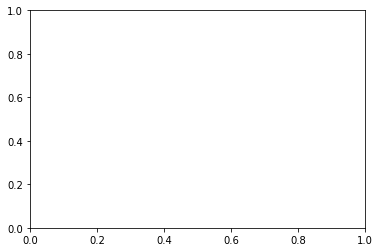

In [10]:
plt.figure(1)
plt.plot(up,num)  # plot绘制折线图 
plt.draw() 

In [ ]:
pro = exs.transpose()[abnormal_count>60]
pro
pro[(pro<upper) & (pro > lower)] = None


In [ ]:
pro  = list(t[t>0].index)

In [145]:
if ("TXD12" in corr.index) and ("MNB" in corr.index):
    print(1)

In [139]:
corr


,TXD12,MTNB,CIAO1,FND3B,MCE1,CBX3,FA26E,NFASC,UBP5,ALDOA,...,FZD8,PA2GD,MUCEN,XK,SIRPG,HMGN2,5NT3B,ICOS,FOXP3,RL36A
TXD12,0.000000,0.340891,0.519467,0.332459,0.036545,0.315737,-0.483329,-0.260951,0.489107,0.394147,...,-0.287083,-0.032910,-0.136441,-0.451514,0.154055,0.373758,-0.063766,0.087997,-0.057919,0.444108
MTNB,0.340891,0.000000,0.506908,0.007933,0.120732,0.090351,-0.468035,-0.232955,0.453072,0.675497,...,-0.155357,-0.138142,-0.120610,-0.138142,-0.015246,0.172430,-0.005522,0.085908,-0.288626,0.054713
CIAO1,0.519467,0.506908,0.000000,0.386828,0.195195,0.338481,-0.555326,-0.412787,0.681663,0.523034,...,-0.270112,0.241052,-0.025395,-0.295622,0.128731,0.248462,0.077344,0.374337,-0.235846,0.461360
FND3B,0.332459,0.007933,0.386828,0.000000,0.076852,0.503944,-0.165289,-0.306703,0.244672,0.435851,...,-0.172286,0.473080,-0.118100,-0.054000,0.221092,-0.138001,0.150419,0.094978,0.219117,0.220577
MCE1,0.036545,0.120732,0.195195,0.076852,0.000000,0.447142,-0.165097,-0.173180,0.277200,0.296412,...,-0.076266,-0.016296,-0.052469,-0.121791,0.201826,0.075834,0.047332,-0.027713,0.034680,0.043413
CBX3,0.315737,0.090351,0.338481,0.503944,0.447142,0.000000,-0.416649,-0.194346,0.263200,0.202653,...,-0.195826,0.218286,0.015871,-0.325035,0.243226,0.115456,0.049568,0.133029,0.115979,0.474645
FA26E,-0.483329,-0.468035,-0.555326,-0.165289,-0.165097,-0.416649,0.000000,0.200436,-0.479229,-0.445438,...,0.232806,0.102329,0.128646,0.735960,-0.242835,-0.270089,-0.212973,-0.187918,0.124636,-0.323926
NFASC,-0.260951,-0.232955,-0.412787,-0.306703,-0.173180,-0.194346,0.200436,0.000000,-0.318151,-0.481322,...,0.261801,-0.005245,0.162292,-0.031731,-0.113774,-0.231993,-0.146908,-0.022237,0.139438,-0.084554
UBP5,0.489107,0.453072,0.681663,0.244672,0.277200,0.263200,-0.479229,-0.318151,0.000000,0.563655,...,-0.326535,-0.076930,0.012514,-0.499517,0.124465,0.341253,0.245449,0.290952,-0.168180,0.344140
ALDOA,0.394147,0.675497,0.523034,0.435851,0.296412,0.202653,-0.445438,-0.481322,0.563655,0.000000,...,-0.274328,0.043274,-0.008245,-0.269045,0.205998,0.184532,-0.015020,-0.010303,-0.149455,0.093887
